<a href="https://colab.research.google.com/github/lithiumpropeller/Calories-Burnt-Prediction/blob/main/Calories_Burnt_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the required dependencies 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Data Collection and Preprocessing

In [ ]:
# loading the data from csv file to a Pandas DataFrame and getting the first 5 rows 
calories = pd.read_csv('/content/calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
# Combining the 2 datasets to get the complete dataframe
df = pd.concat([exercise_data,calories['Calories']],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# Checking the shape of the dataframe
df.shape

(15000, 9)

In [ ]:
# Check the detailed information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# check for Null values in the dataframe
df.isna().sum() 

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
# Statistical Summary of the dataset
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Visualising the Data 

In [ ]:
sns.set_theme()

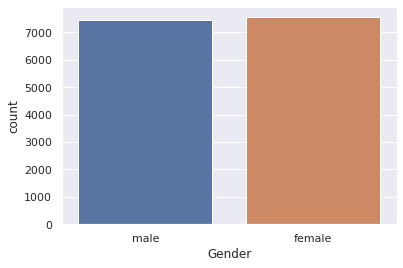

In [ ]:
# Getting the count of male and female in the dataset
sns.countplot(x='Gender',data=df)

Fom the above countplot, we can see that the number of male and female in this dataset is nearly the same.

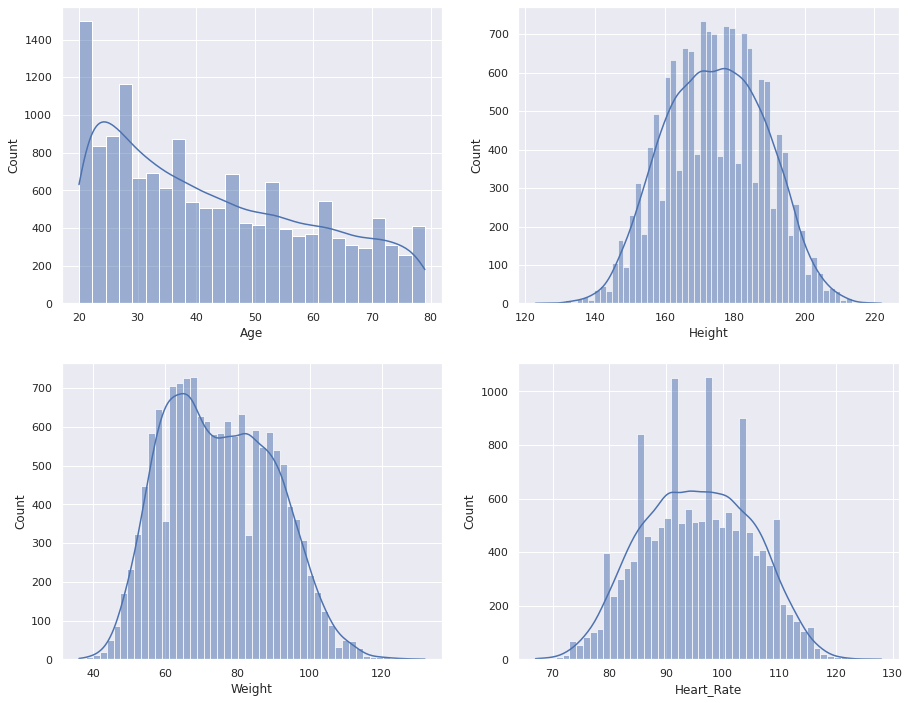

In [ ]:
# Plotting the distribution of different features to see where the data is larely concentrated
plt.figure(figsize=(15,12))
cols=['Age','Height','Weight','Heart_Rate']
a=1
for i in range(len(cols)):
  plt.subplot(2,2,a)
  sns.histplot(x=cols[i],data=df,kde=True)
  a+=1


* Here we can see that Height and Heart_Rate are normally distributed while the other two are not.
* In the plot of Age, we see that the peak is between 20 and 30 suggesting that the people of this age tends to workout more and as the age increases less people are motivated to workout regularly.


### Now let's see the correlation between the features using a heatmap

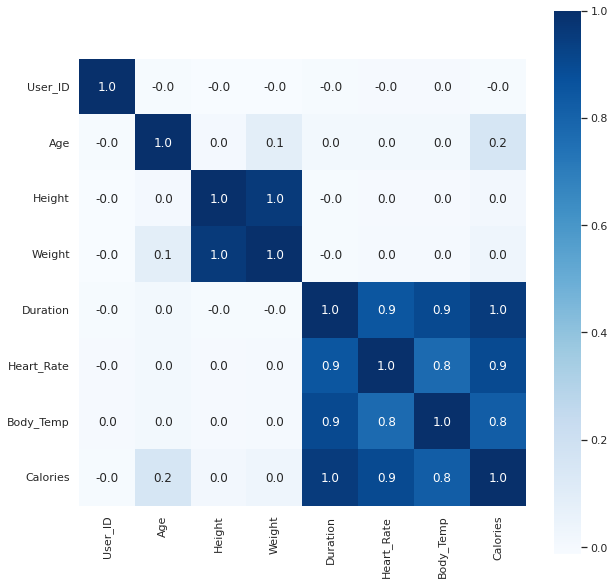

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',square=True,fmt='.1f')

From the above heatmap we can infer the following things:
*  Duration and Calories as well as Height and Weight have perfct positive correlation meaning as value of one feature increases the other also increases.
Eg. As the duration of the workout increases the Calories burnt also increases.
* There are some other features such as Body_Temp and Heart_Rate which have also very strong correlation with our Target Calories.    

### Checking for any significant outliers 

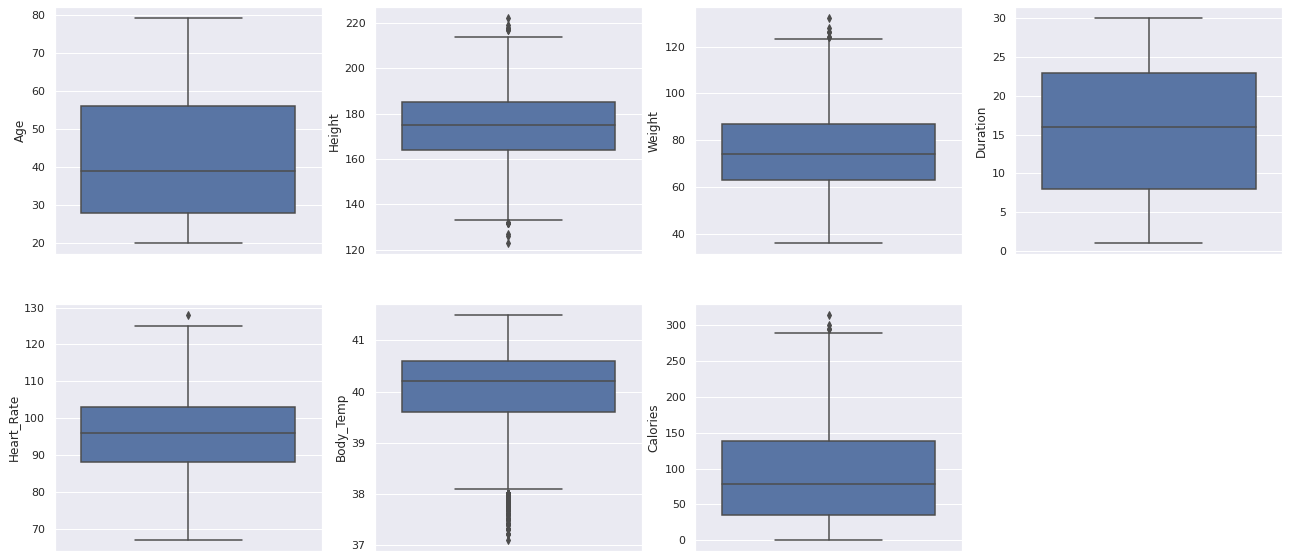

In [ ]:
plt.figure(figsize=(22,10))
a=1
for i in df.iloc[:,2:]:
  plt.subplot(2,4,a)
  sns.boxplot(y=df[i])
  a+=1

* There aren't any significant outliers present in the dataset which can impact our model adversely.

### Converting the Categorical Data into Numeric.

In [ ]:
df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
# Encoded 0 for "Male" and 1 for "Female"
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


### Defining the Dependent Feature and Independent Features

In [ ]:
X = df.drop(columns=['User_ID','Calories'], axis=1) # Dropping the User_ID column as well since it doesn't convey much information
y = df['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


### Splitting the data into Training and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Scaling the Data to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.9905447  -0.2743878  -0.38005173 ... -1.50716844 -1.09434547
  -1.95934786]
 [-1.00954556 -0.74637671  1.37260409 ... -0.7865859  -0.47050539
  -0.54883026]
 [ 0.9905447   2.08555674  0.5313293  ... -1.02678008 -1.19831881
  -0.80528801]
 ...
 [ 0.9905447  -1.04136978 -0.5202642  ...  0.53448209  0.46525473
   0.47700072]
 [ 0.9905447  -0.39238503 -0.5202642  ...  1.49525881  1.29704151
   0.98991621]
 [-1.00954556 -0.74637671  0.88186046 ... -0.66648881 -0.15858535
   0.22054298]]


### Define a function to create different models on which the data is trained

In [ ]:
# Creat a function with many machine leraning models 

def models(X_train, Y_train):
    
    #Linear regression 
    from sklearn.linear_model import LinearRegression
    linear = LinearRegression()
    linear.fit(X_train,Y_train)
    
    # Use XGBoost
    from xgboost import XGBRegressor
    xgb = XGBRegressor()
    xgb.fit(X_train,Y_train)

    # Use decision tree
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor(random_state = 0)
    tree.fit(X_train,Y_train)
    
    # Use Random forest 
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators=  30, random_state = 0)
    forest.fit(X_train,Y_train)

    # Training Score for Each Model
    print('[0] Linear Regression Score : ', linear.score(X_train,Y_train))
    print('[1] XGB Regressor Score : ', xgb.score(X_train,Y_train))
    print('[2] Decision tree : ', tree.score(X_train,Y_train))
    print('[3] Random forest :', forest.score(X_train,Y_train))

    return linear,xgb,tree,forest

In [ ]:
model = models(X_train,y_train)

[17:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0] Linear Regression Score :  0.9672762198112508
[1] XGB Regressor Score :  0.9966777021480265
[2] Decision tree :  1.0
[3] Random forest : 0.9996169456810046


* Here on the Training Data we see that Decision Tree gives a perfect score whereas RandomForest and XGBoost also gets nearly perfect score only the LinearRegression model gets a score of about 97%.
* Now let's test this models on our testing data and check which model performs well. 

### Evaluation of the Model using different Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

for i in range(len(model)):
  mse = mean_squared_error(y_test,model[i].predict(X_test))
  r2 = r2_score(y_test,model[i].predict(X_test))
  print('Model [{}] MSE = "{}"'.format(i, mse))
  print('Model [{}] R2 Score = "{}"'.format(i, r2))
  print()

Model [0] MSE = "130.08707386188385"
Model [0] R2 Score = "0.9668790377181355"

Model [1] MSE = "14.506464988228966"
Model [1] R2 Score = "0.9963065655529431"

Model [2] MSE = "28.285666666666668"
Model [2] R2 Score = "0.9927982967794423"

Model [3] MSE = "7.675756296296296"
Model [3] R2 Score = "0.9980457056398675"



When we look at the Mean Squared Error and R2_Score of Different Models , we see that the **RandomForest model gives the least error and best R2_score** so we can use the RandomForest model to predict the amount of Calories burnt for unknown/new data points.

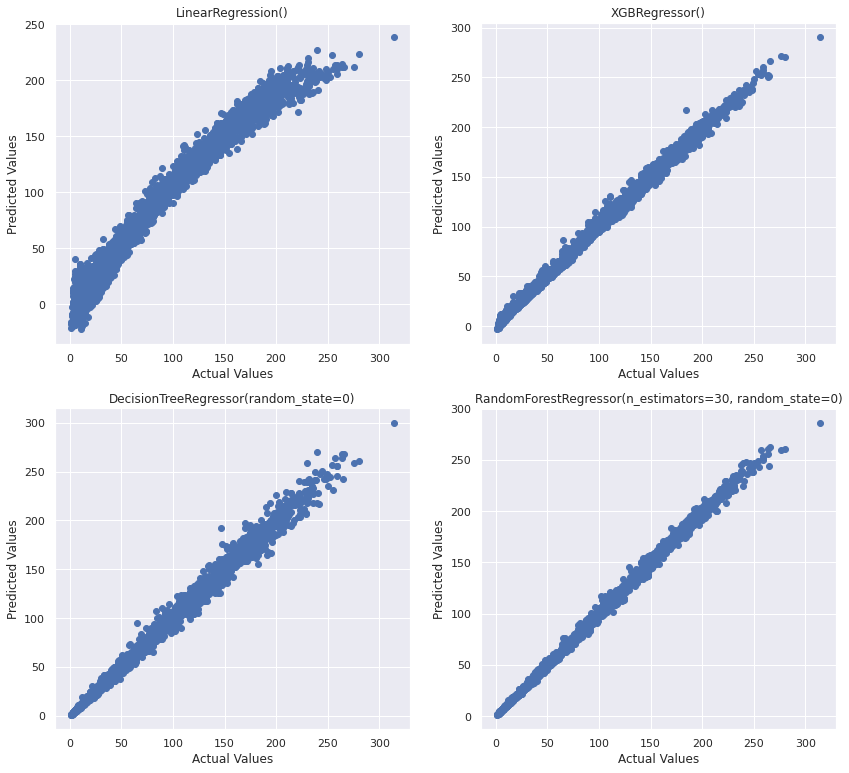

In [ ]:
# Let's Evaluate the different models visually using a scatter plot

plt.figure(figsize=(14,13))
a=1
for i in range(len(model)):
  plt.subplot(2,2,a)
  plt.scatter(y_test,model[i].predict(X_test))
  plt.xlabel('Actual Values')
  plt.ylabel("Predicted Values")
  plt.title(model[i])
  a+=1

From the above Scatterplot as well we can see that Random Forest gives the best fit line among the 4. XGB comes second followed by Decision Tree and Linear Regression.

Let's now test the Random Forest Model on an Unknown Record to see whether our model works or not.

In [ ]:
# Getting the Random Forest Model from the 4 models trained
rf = model[3]

# Putting an unknown input to check whether the model works or not
my_calories_burnt = [[0,25,185,85,20,104,40.5]]

# Scaling the Data
my_calories_burnt = sc.fit_transform(my_calories_burnt)

# Predict the Calories Burnt
pred = rf.predict(my_calories_burnt)
print("Total Calories Burnt:",round(pred[0],2))

Total Calories Burnt: 82.53
